## Observations and Insights

## Dependencies and starter code

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mice = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = 'left')
mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [8]:
len(mice["Mouse ID"].unique())

249

In [9]:
#Duplicate Mice
duplicates = mice.loc[mice.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [10]:
#Clean data Frame by droping duplicates
mice = mice[mice["Mouse ID"].isin(duplicates) == False]
mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
mice["Mouse ID"].nunique()

248

In [12]:
Regimen_group = mice.groupby(["Drug Regimen"])
mean = Regimen_group["Tumor Volume (mm3)"].mean()
median = Regimen_group["Tumor Volume (mm3)"].median()
variance = Regimen_group["Tumor Volume (mm3)"].var()
standard_dev = Regimen_group["Tumor Volume (mm3)"].std()
sem = Regimen_group["Tumor Volume (mm3)"].sem()
Regimens_data = pd.DataFrame({"Tumor Vol Mean" : mean, "Tumor Vol Median" : median, "Variance" : variance, "Std" : standard_dev, "SEM" : sem})
Regimens_data

,Tumor Vol Mean,Tumor Vol Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
Regimen_group = mice.groupby(["Drug Regimen"])
Regimen_group.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27
11,b559,0,45.0,0,Naftisol,Male,20,26
13,x930,0,45.0,0,Naftisol,Male,13,26


## Bar plots

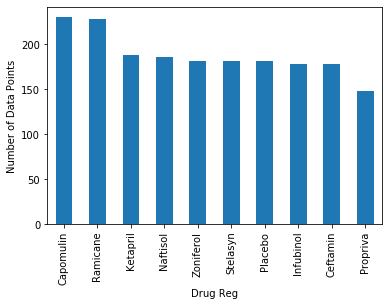

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = mice["Drug Regimen"].value_counts()
counts.plot(kind = "bar")
plt.xlabel("Drug Reg")
plt.xticks(rotation = 90)
plt.ylabel("Number of Data Points") 
plt.show()

#plt.bar(x_axis, count, color='r', alpha=0.5, align="center")

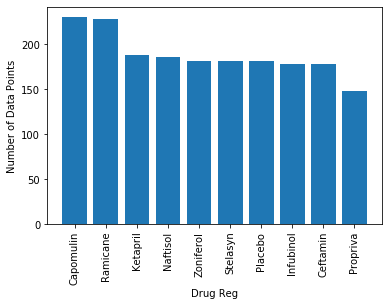

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = mice["Drug Regimen"].value_counts()

plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Reg")
plt.xticks(rotation = 90)
plt.ylabel("Number of Data Points") 
plt.show()

## Pie plots

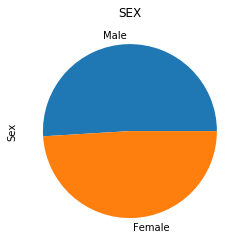

In [16]:
gender_list = mice["Sex"].value_counts()
gender_pie = gender_list.plot(kind="pie", y=gender_list, title=("SEX"))
#gender_pie.set_ylabel("")

#plt.show()
#plt.tight_layout()
#plt.axis("equal")
#gender_list


In [17]:
type (gender_list)

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x221e3ae8c08>,
 [Text(-0.681404241901343, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

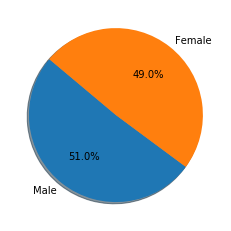

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_list, labels=gender_list.index.values, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")

## Quartiles, outliers and boxplots

In [19]:
mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Get all mice on top four drugs
TopDrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

mice['trueindex'] = mice['Drug Regimen'].isin(TopDrugs)

mice = mice.loc[mice['trueindex'] == True]

#Sort by timepoint
new_group = mice.groupby(["Mouse ID"]).max()
new_group = new_group.reset_index()
merge_data = new_group[['Mouse ID', 'Timepoint']].merge(mice, how = 'left', on = ['Mouse ID', 'Timepoint'])

print(merge_data)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  trueindex  
0   Female          20        

In [21]:
#Calculate the IQR
quartiles = merge_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(iqr)

22.74251795250001


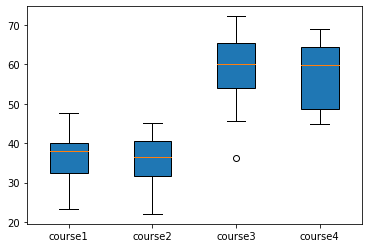

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#ax1 = merge_data['Tumor Volume (mm3)']

Capomulin = merge_data.loc[merge_data['Drug Regimen'] == TopDrugs[0]]
Ramicane = merge_data.loc[merge_data['Drug Regimen'] == TopDrugs[1]]
Infubinol = merge_data.loc[merge_data['Drug Regimen'] == TopDrugs[2]]
Ceftamin = merge_data.loc[merge_data['Drug Regimen'] == TopDrugs[3]]

box_plot_data=[Capomulin['Tumor Volume (mm3)'],Ramicane['Tumor Volume (mm3)'],Infubinol['Tumor Volume (mm3)'],Ceftamin['Tumor Volume (mm3)']]

plt.boxplot(box_plot_data,patch_artist=True,labels=['course1','course2','course3','course4'])
plt.show()



# Axes.boxplot(self, x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, \*, data=None)[source]


## Line and scatter plots

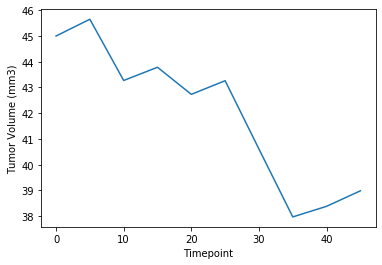

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = mice.loc[mice['Drug Regimen'] == TopDrugs[0]]
#test_mouse = Capomulin.sample()["Mouse ID"]
test_case = Capomulin.loc[Capomulin['Mouse ID'] == 'b128']

x_values = test_case['Timepoint']
y_values = test_case['Tumor Volume (mm3)']


plt.plot(x_values,y_values)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



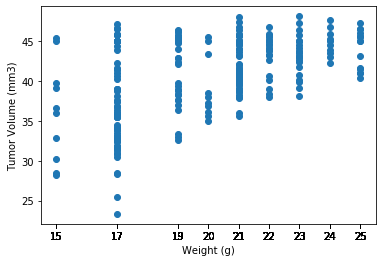

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin['Weight (g)'],Capomulin['Tumor Volume (mm3)'])
plt.xticks(Capomulin['Weight (g)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = Capomulin['Weight (g)']
size = Capomulin['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,size)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


The r-squared is: 0.2763600223455914


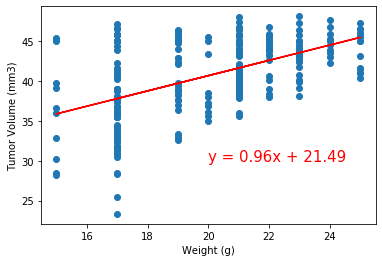

In [75]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, size)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,size)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20, 30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()